<a href="https://colab.research.google.com/github/ajit-ai/DataScience/blob/main/TensorflowExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data: flatten the images and normalize the pixel values
train_images = train_images.reshape((train_images.shape[0], 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28 * 28)).astype('float32') / 255

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8791 - loss: 0.4324
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.1204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9823 - loss: 0.0588
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0418
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9769 - loss: 0.0745
Test accuracy: 0.980400025844574


In [ ]:
import tensorflow as tf

# Define variables with initial values
a = tf.Variable(2.0, dtype=tf.float32)
b = tf.Variable(3.0, dtype=tf.float32)

# Perform the multiplication
y = tf.multiply(a, b)

# Print the result (in eager execution, this will evaluate immediately)
print(y.numpy())

6.0


In [ ]:
import tensorflow as tf

# In TensorFlow 2.x with eager execution, operations are evaluated immediately.
# You don't need tf.Session.
# To perform the multiplication with different values for a and b,
# you can define a function that takes a and b as inputs.

@tf.function # Use tf.function to compile the function into a TensorFlow graph for better performance
def multiply_inputs(a_val, b_val):
  a = tf.constant(a_val, dtype=tf.float32)
  b = tf.constant(b_val, dtype=tf.float32)
  y = tf.multiply(a, b)
  return y

# Now you can call the function with different values
print("%f should equal 2.0" % multiply_inputs(1.0, 2.0).numpy())
print("%f should equal 9.0" % multiply_inputs(3.0, 3.0).numpy())

2.000000 should equal 2.0
9.000000 should equal 9.0


In [ ]:
import tensorflow as tf
import numpy as np

trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise

# Use tf.Variable for the weight
w = tf.Variable(0.0, name="weights", dtype=tf.float32)

# Define the model
def model(X, w):
    return tf.multiply(X, w)

# Define the loss function (Mean Squared Error)
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(0.01)

# Training loop
for i in range(100):
    with tf.GradientTape() as tape:
        y_model = model(trX, w)
        current_loss = loss(trY, y_model)

    # Calculate gradients and update the weight
    gradients = tape.gradient(current_loss, [w])
    optimizer.apply_gradients(zip(gradients, [w]))

    if i % 10 == 0:
        print(f"Epoch {i}: Loss = {current_loss.numpy()}")

# Print the final weight
print(f"Final weight: {w.numpy()}")

Epoch 0: Loss = 1.3810553550720215
Epoch 10: Loss = 1.2220211029052734
Epoch 20: Loss = 1.0832737684249878
Epoch 30: Loss = 0.9622253775596619
Epoch 40: Loss = 0.856618344783783
Epoch 50: Loss = 0.7644827961921692
Epoch 60: Loss = 0.6841002106666565
Epoch 70: Loss = 0.6139715313911438
Epoch 80: Loss = 0.5527886748313904
Epoch 90: Loss = 0.4994104206562042
Final weight: 0.9470247626304626


In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten and normalize
trX = trX.reshape(trX.shape[0], 28 * 28).astype('float32') / 255
teX = teX.reshape(teX.shape[0], 28 * 28).astype('float32') / 255

# Build the model using TensorFlow 2.x Keras API
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=100, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4870 - loss: 1.7362
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8321 - loss: 0.7736
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8558 - loss: 0.6136
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8669 - loss: 0.5389
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8731 - loss: 0.4988
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8783 - loss: 0.4685
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8834 - loss: 0.4473
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8872 - loss: 0.4292
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8891 - loss: 0.4181
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8904 - loss: 0.4084
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8947 - loss: 0.3993
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten and normalize
trX = trX.reshape(trX.shape[0], 28 * 28).astype('float32') / 255
teX = teX.reshape(teX.shape[0], 28 * 28).astype('float32') / 255

# Convert labels to one-hot encoding (if your model requires it, although sparse_categorical_crossentropy doesn't)
# trY = tf.one_hot(trY, depth=10).numpy()
# teY = tf.one_hot(teY, depth=10).numpy()

# Build the model using TensorFlow 2.x Keras API
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=100, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

# Example prediction
# predictions = model.predict(teX[:5])
# print("Predictions for the first 5 test images:")
# print(np.argmax(predictions, axis=1))
# print("Actual labels for the first 5 test images:")
# print(teY[:5])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5585 - loss: 1.6298
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8342 - loss: 0.7596
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8588 - loss: 0.6019
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8678 - loss: 0.5345
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8723 - loss: 0.4932
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8785 - loss: 0.4658
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.4437
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8841 - loss: 0.4355
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8859 - loss: 0.4186
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8884 - loss: 0.4129
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8920 - loss: 0.3975
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [20]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten and normalize
trX = trX.reshape(trX.shape[0], 28 * 28).astype('float32') / 255
teX = teX.reshape(teX.shape[0], 28 * 28).astype('float32') / 255

# Build the model using TensorFlow 2.x Keras API
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=100, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5354 - loss: 1.6569
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8345 - loss: 0.7654
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8531 - loss: 0.6117
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8666 - loss: 0.5374
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8699 - loss: 0.5034
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8777 - loss: 0.4703
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8827 - loss: 0.4436
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8849 - loss: 0.4314
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8880 - loss: 0.4174
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8890 - loss: 0.4124
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8927 - loss: 0.3992
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten the images and normalize the pixel values
trX = trX.reshape((trX.shape[0], 28 * 28)).astype('float32') / 255
teX = teX.reshape((teX.shape[0], 28 * 28)).astype('float32') / 255

# Build the model (similar to the MLP structure you had in mind)
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(28 * 28,)), # Hidden layer with sigmoid activation
    Dense(10, activation='softmax') # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='sgd', # Using SGD as in your original code, though 'adam' might perform better
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=100, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3762 - loss: 2.1874
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7059 - loss: 1.6349
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7625 - loss: 1.2474
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8001 - loss: 1.0002
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8201 - loss: 0.8446
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8348 - loss: 0.7444
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.6690
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8544 - loss: 0.6202
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8612 - loss: 0.5788
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.5408
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8708 - loss: 0.5176
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [23]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten and normalize
trX = trX.reshape(trX.shape[0], 28 * 28).astype('float32') / 255
teX = teX.reshape(teX.shape[0], 28 * 28).astype('float32') / 255

# Build the model using TensorFlow 2.x Keras API
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=100, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5417 - loss: 1.6496
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8403 - loss: 0.7649
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8618 - loss: 0.6007
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8677 - loss: 0.5393
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8741 - loss: 0.4953
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8790 - loss: 0.4690
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8829 - loss: 0.4454
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8860 - loss: 0.4301
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8896 - loss: 0.4166
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8887 - loss: 0.4119
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8921 - loss: 0.4006
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten and normalize
trX = trX.reshape(trX.shape[0], 28 * 28).astype('float32') / 255
teX = teX.reshape(teX.shape[0], 28 * 28).astype('float32') / 255

# Build a simple dense model using TensorFlow 2.x Keras API
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=5, batch_size=32) # Reduced epochs and batch size for quicker execution

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8834 - loss: 0.4199
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9658 - loss: 0.1165
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9780 - loss: 0.0753
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0562
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0425
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 0.0996
Test accuracy: 0.9746000170707703


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3121 - val_loss: 0.1349
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1255 - val_loss: 0.1023
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0997 - val_loss: 0.0887
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0876 - val_loss: 0.0812
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0809 - val_loss: 0.0769
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


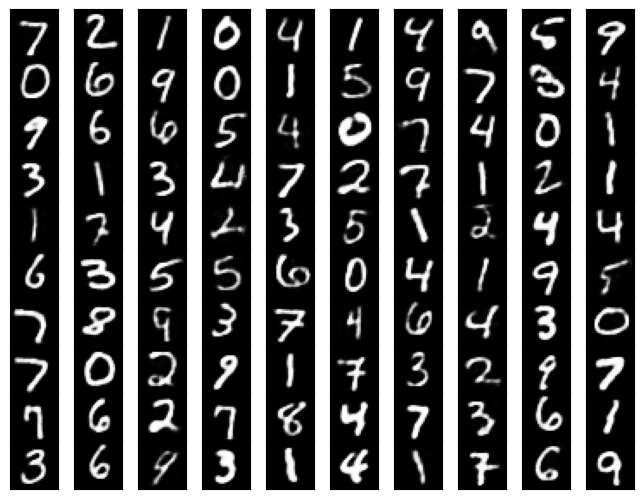

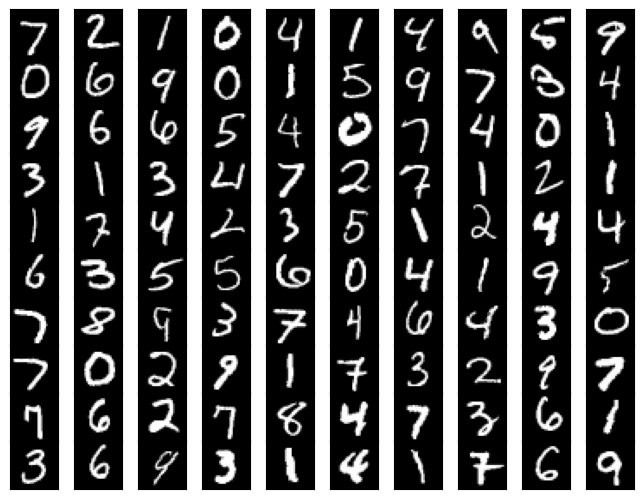

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: flatten and normalize
trX = trX.reshape(trX.shape[0], 28 * 28).astype('float32') / 255
teX = teX.reshape(teX.shape[0], 28 * 28).astype('float32') / 255

# Define the autoencoder model using Keras Functional API
input_img = tf.keras.layers.Input(shape=(28*28,))
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(28*28, activation='sigmoid')(encoded)

autoencoder = tf.keras.models.Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(trX, trX,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(teX, teX))

# Predict reconstructed images
predicted_imgs = autoencoder.predict(teX[:100])
input_imgs = teX[:100]

# Visualizing reconstructions
def vis(images, save_name):
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim)))
    n_image_cols = int(np.ceil(dim * 1.0/n_image_rows))
    gs = gridspec.GridSpec(n_image_rows,n_image_cols,top=1., bottom=0., right=1., left=0., hspace=0., wspace=0.)
    for g,count in zip(gs,range(int(dim))):
        ax = plt.subplot(g)
        ax.imshow(images[count,:].reshape((28,28)), cmap='gray') # Added cmap='gray' for grayscale
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig(save_name + '_vis.png')
    plt.show()

# Plot the reconstructed images
vis(predicted_imgs,'pred')


# Plot input images to compare with
vis(input_imgs,'in')

In [30]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: normalize pixel values
trX = trX.astype('float32') / 255
teX = teX.astype('float32') / 255

# The MNIST images are 28x28. We can treat each row of the image as a sequence of 28 pixels
# So, input shape for RNN will be (time_steps, input_dim) = (28, 28)

# Build a simple RNN model using TensorFlow 2.x Keras API
model = Sequential([
    SimpleRNN(128, input_shape=(trX.shape[1], trX.shape[2])), # RNN layer
    Dense(10, activation='softmax') # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=5, batch_size=32) # Reduced epochs and batch size for quicker execution

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")





/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8234 - loss: 0.5805
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9404 - loss: 0.2029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9477 - loss: 0.1779
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9545 - loss: 0.1576
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9591 - loss: 0.1442
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9493 - loss: 0.1741
Test accuracy: 0.9559000134468079


Word count [('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3)]
Sample data [5, 9, 10, 11, 12, 13, 5, 14, 15, 16] ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I']
skip-gram pairs [[9, 5], [9, 10], [10, 9], [10, 11], [11, 10]]
Batches (x, y) (array([ 8,  0, 23]), array([[23],
       [ 2],
       [ 8]]))
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0289 - loss: 3.5546      
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1154 - loss: 3.5514     
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1263 - loss: 3.5486 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1375 - loss: 3.5446 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1427 - loss: 3.5441 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2170 - loss: 3.5378 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2150 - loss: 3.5341 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

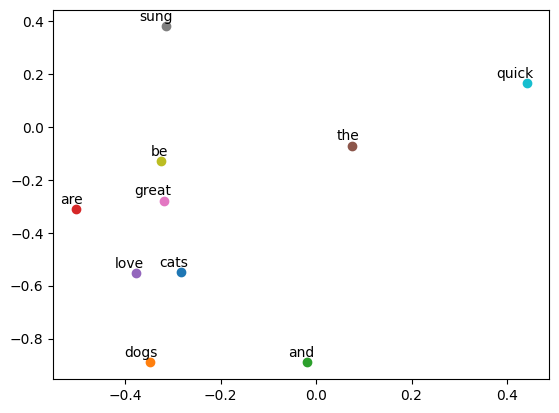

In [34]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Using matplotlib inline is not necessary in Colab

# Configuration
batch_size = 20
embedding_size = 2
num_sampled = 15

# Sample sentences
sentences = ["the quick brown fox jumped over the lazy dog",
            "I love cats and dogs",
            "we all love cats and dogs",
            "cats and dogs are great",
            "sung likes cats",
            "she loves dogs",
            "cats can be very independent",
            "cats are great companions when they want to be",
            "cats are playful",
            "cats are natural hunters",
            "It's raining cats and dogs",
            "dogs and cats love sung"]

# sentences to words and count
words = " ".join(sentences).split()
count = collections.Counter(words).most_common()
print ("Word count", count[:5])

# Build dictionaries
rdic = [i[0] for i in count] #reverse dic, idx -> word
dic = {w: i for i, w in enumerate(rdic)} #dic, word -> id
voc_size = len(dic)

# Make indexed word data
data = [dic[word] for word in words]
print('Sample data', data[:10], [rdic[t] for t in data[:10]])

# Let's make a training data for window size 1 for simplicity
# ([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox), ...
cbow_pairs = [];
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);

# Let's make skip-gram pairs
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs = [];
for c in cbow_pairs:
    skip_gram_pairs.append([c[1], c[0][0]])
    skip_gram_pairs.append([c[1], c[0][1]])
print('skip-gram pairs', skip_gram_pairs[:5])

def generate_batch(size):
    assert size < len(skip_gram_pairs)
    x_data=[]
    y_data = []
    r = np.random.choice(range(len(skip_gram_pairs)), size, replace=False)
    for i in r:
        x_data.append(skip_gram_pairs[i][0])  # n dim
        y_data.append([skip_gram_pairs[i][1]])  # n, 1 dim
    return np.array(x_data), np.array(y_data) # Return as numpy arrays

# generate_batch test
print ('Batches (x, y)', generate_batch(3))

# Build the Keras model for word embeddings
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=voc_size, output_dim=embedding_size), # Removed input_length
    tf.keras.layers.Dense(voc_size, activation='softmax') # Output layer for classification
])

# Compile the model
# Use categorical crossentropy as the output is one-hot encoded (implicitly handled by sparse_categorical_crossentropy)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Generate batches for training
x_train, y_train = zip(*skip_gram_pairs)
x_train = np.array(x_train)
y_train = np.array(y_train)

model.fit(x_train, y_train, epochs=100, batch_size=batch_size)

# Get the trained embeddings
# The embeddings are in the first layer (Embedding layer)
trained_embeddings = model.layers[0].get_weights()[0]


# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = rdic[:10] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    plt.savefig("word2vec.png")
    plt.show() # Add plt.show() to display the plot

In [36]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset using tf.keras.datasets
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten and normalize
trX = trX.reshape(trX.shape[0], 28 * 28).astype('float32') / 255
teX = teX.reshape(teX.shape[0], 28 * 28).astype('float32') / 255

# Build a simple dense model using TensorFlow 2.x Keras API
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=5, batch_size=32) # Reduced epochs and batch size for quicker execution

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.4329
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9641 - loss: 0.1210
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0777
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9828 - loss: 0.0558
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9875 - loss: 0.0415
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.1042
Test accuracy: 0.9717000126838684


In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(trX, trY), (teX, teY) = mnist.load_data()

# Preprocess the data: flatten the images and normalize the pixel values
trX = trX.reshape((trX.shape[0], 28 * 28)).astype('float32') / 255
teX = teX.reshape((teX.shape[0], 28 * 28)).astype('float32') / 255

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', # Using Adam optimizer
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(trX, trY, epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(teX, teY)
print(f"Test accuracy: {accuracy}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8786 - loss: 0.4243
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9647 - loss: 0.1182
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9771 - loss: 0.0749
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9832 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0417
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.0936
Test accuracy: 0.9754999876022339


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


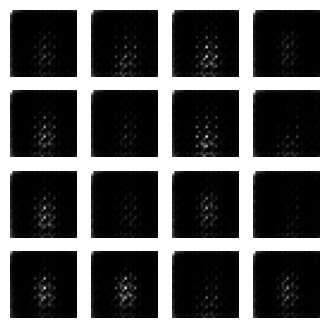

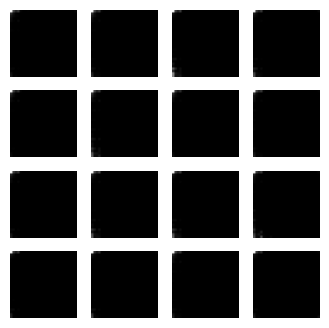

KeyboardInterrupt: 

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset using tf.keras.datasets
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Create batches
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Define the Generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

# Define the Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))

    return model

# Create the models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Define loss functions and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Define the training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier to visualize progress)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

def train(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

  # Generate after the final epoch
  generate_and_save_images(generator,
                           epochs,
                           seed)

# Start training
train(train_dataset, EPOCHS)